## Import libraries

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from sig_seasontrans import SMSig

# Specify current directory create output directory if it does not exist
os.getcwd()


'g:\\Shared drives\\Ryoko and Hilary\\SMSigxModel\\analysis\\libs\\SMSig'

In [2]:
def to_datetime(df, time_column, format="%Y-%m-%d %H:%M:%S"):
    df = df.copy()
    df[time_column] = pd.to_datetime(df[time_column], format=format)
    return df.set_index(time_column)

## Read in observed data

## Coweeta

In [3]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Coweeta"
test_file = "test_daily_2014_2018_sm_basinavg.csv"

In [4]:
_data = pd.read_csv(os.path.join(home_dir,"data", site, test_file))
_data = to_datetime(_data, "Time")
data = _data["Soil Moisture Content"]

data.head()

Time
2015-08-04    0.153545
2015-08-05    0.151452
2015-08-06    0.164292
2015-08-07    0.164678
2015-08-08    0.159843
Name: Soil Moisture Content, dtype: float64

In [5]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    ts_time=data.index.to_numpy(),
    ts_value=data.to_numpy(),
    plot_results=True,
    plot_label="obs",
    verbose=True
)

In [6]:
_t_valley_manual_input = pd.read_csv(os.path.join(home_dir,"data", site, "seasonal_cycel_valleys.csv"), header=None)
t_valley_manual_input = pd.to_datetime(_t_valley_manual_input[0])
t_valley_manual_input

0   2015-08-09
1   2016-11-10
2   2017-10-07
3   2018-05-07
Name: 0, dtype: datetime64[ns]

Processing 2015:0
dry2wet Shift=0.22 slope=0.00107 start timing: 13.874987 end timing: 84.266358


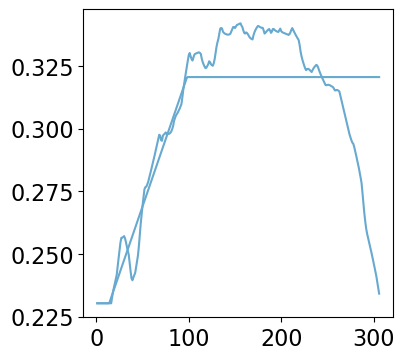

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2016:0
dry2wet Shift=-0.05 slope=0.00547 start timing: 33.125266 end timing: 30.000000


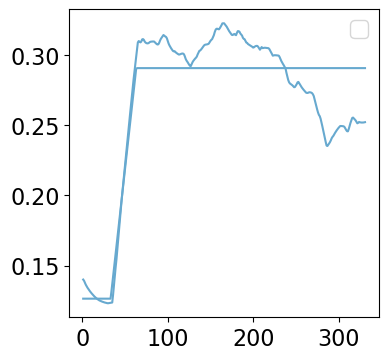

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2017:0
dry2wet Shift=0.24 slope=0.00075 start timing: 17.999918 end timing: 84.187189


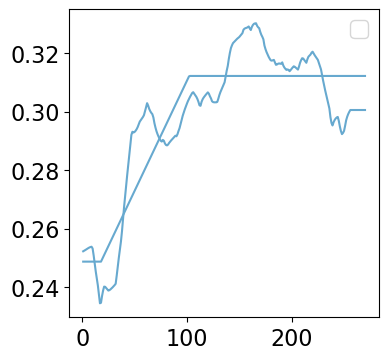

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2015:1
wet2dry Shift=0.38 slope=-0.00074 start timing: 49.999393 end timing: 292.000000


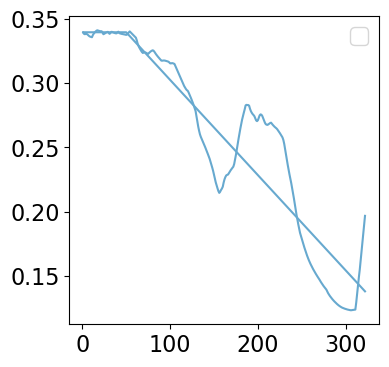

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2016:1
wet2dry Shift=0.34 slope=-0.00083 start timing: 33.435136 end timing: 70.258459


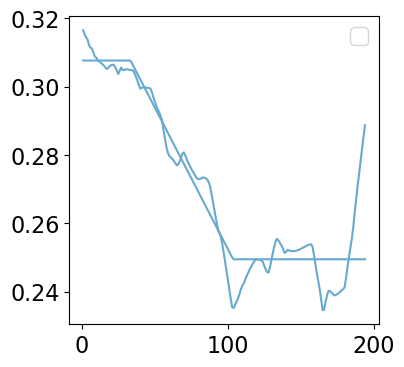

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2017:1
data is not good
Length of the timeseries is less than 90 days


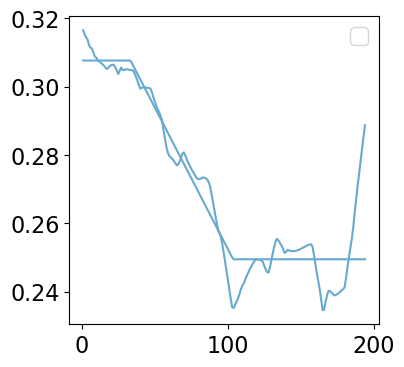

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


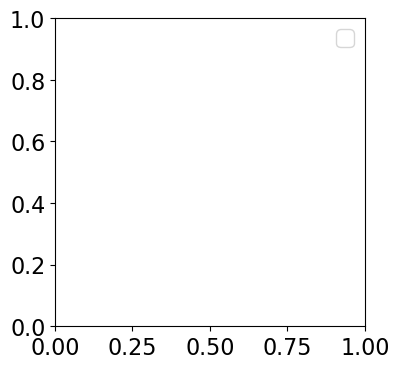

In [7]:
season_trans_obs, start_dates_obs, end_dates_obs = sig_obs.calc_seasontrans(t_valley=t_valley_manual_input)

(array([[2457252.37498723, 2457336.64134541, 2457446.49939348,
         2457738.49939348],
        [2457705.62526557, 2457735.62526557, 2457888.93513628,
         2457959.19359502],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan]]),
 [Timestamp('2015-08-17 20:59:58.896878'),
  Timestamp('2016-11-13 03:00:22.944959'),
  Timestamp('2017-09-24 23:59:52.889531'),
  Timestamp('2016-02-27 23:59:07.596801'),
  Timestamp('2017-05-15 10:26:35.774265')],
 [Timestamp('2015-11-10 03:23:32.243559'),
  Timestamp('2016-12-13 03:00:22.944959'),
  Timestamp('2017-12-18 04:29:26.020865'),
  Timestamp('2016-12-15 23:59:07.596801'),
  Timestamp('2017-07-24 16:38:46.609363')])

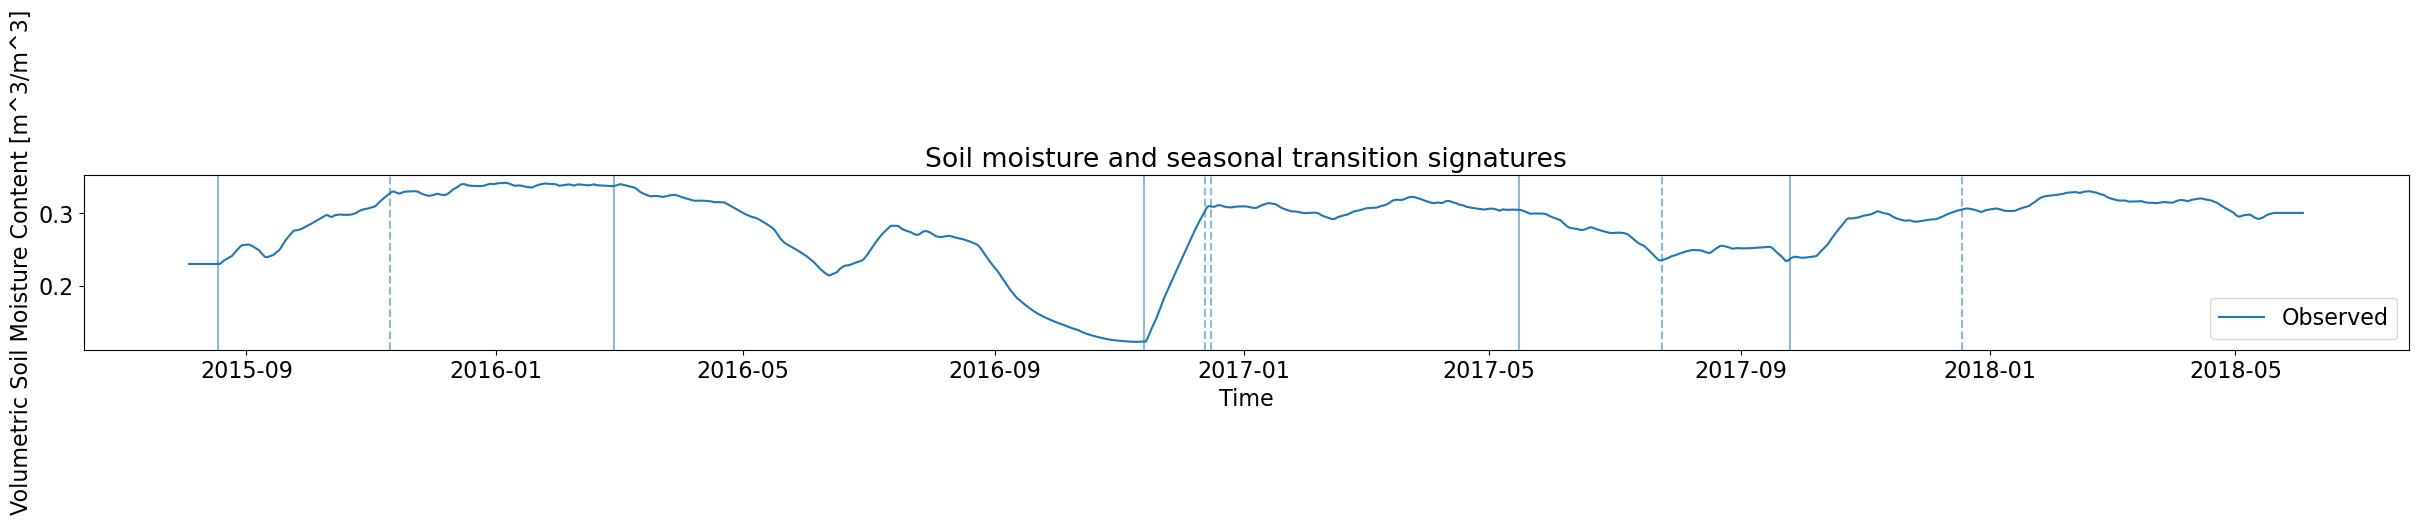

In [8]:

# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()

# f2.savefig(os.path.join(out_path, fn), dpi=600)
season_trans_obs, start_dates_obs, end_dates_obs

# Save the results


### Mahurangi

In [9]:
home_dir = r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis"
site = "Mahurangi"
test_file = "test_daily_1998_2001_sm_basinavg.csv"

In [10]:
_data = pd.read_csv(os.path.join(home_dir, "data", site, test_file))
_data = to_datetime(_data, "Time", format= r"%Y-%m-%d")
data = _data["Soil Moisture Content"]

data.head()

Time
1998-02-20    0.352933
1998-02-21    0.356116
1998-02-22    0.370902
1998-02-23    0.370510
1998-02-24    0.382052
Name: Soil Moisture Content, dtype: float64

In [11]:
# Evaluate using seasonal soil moisture signature
sig_obs = SMSig(
    ts_time=data.index.to_numpy(),
    ts_value=data.to_numpy(),
    plot_results=True,
    plot_label="obs",
    verbose=True
)
# # sig_obs.detrend() # TODO:debug
# sig_obs.movmean()
# t_valley = sig_obs.calc_sinecurve()
# print(t_valley)

In [12]:
_t_valley_manual_input = pd.read_csv(r"G:\Shared drives\Ryoko and Hilary\SMSigxModel\analysis\data\Mahurangi\seasonal_cycel_valleys.csv", header=None)
t_valley_manual_input = pd.to_datetime(_t_valley_manual_input[0])
t_valley_manual_input

0   1998-02-16
1   1999-02-16
2   2000-02-16
3   2001-02-15
4   2002-02-15
5   2003-02-15
Name: 0, dtype: datetime64[ns]

Processing 1998:0
dry2wet Shift=0.37 slope=0.00086 start timing: 9.988010 end timing: 110.789054


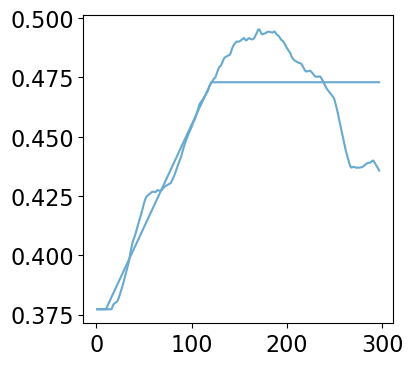

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1999:0
dry2wet Shift=0.32 slope=0.00105 start timing: 53.714660 end timing: 91.325344


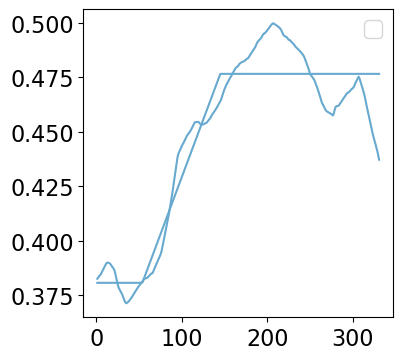

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2000:0
dry2wet Shift=0.21 slope=0.00193 start timing: 88.227619 end timing: 45.285610


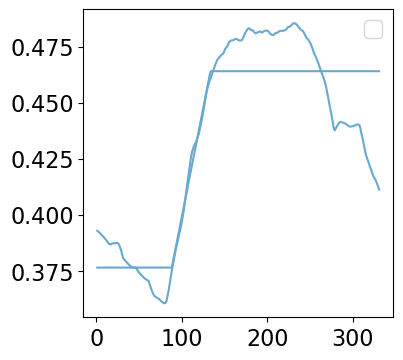

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2001:0
dry2wet Shift=0.38 slope=0.00053 start timing: 23.433894 end timing: 121.566104


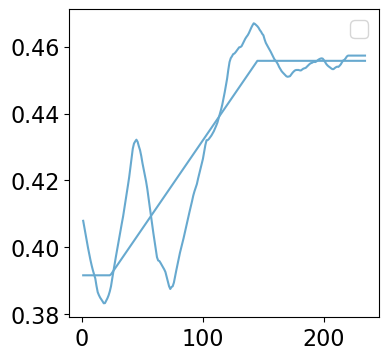

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2002:0
data is not good
Timeseries is empty


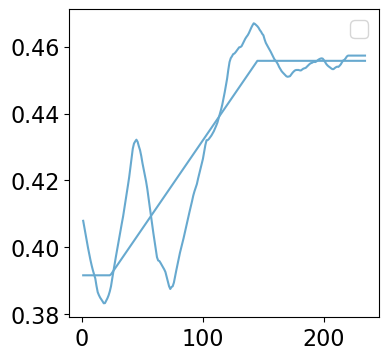

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1998:1
wet2dry Shift=0.53 slope=-0.00073 start timing: 49.998923 end timing: 198.000000


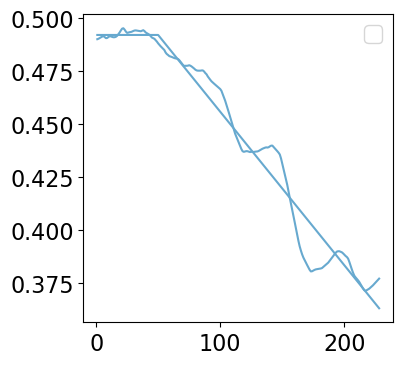

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 1999:1
wet2dry Shift=0.53 slope=-0.00066 start timing: 49.999085 end timing: 198.000000


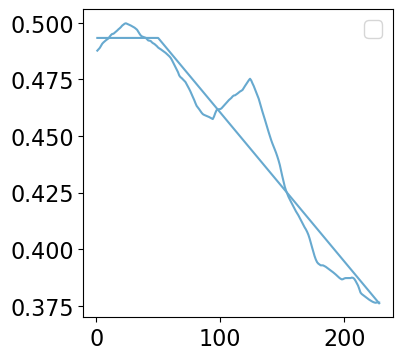

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2000:1
wet2dry Shift=0.50 slope=-0.00050 start timing: 50.000000 end timing: 198.000000


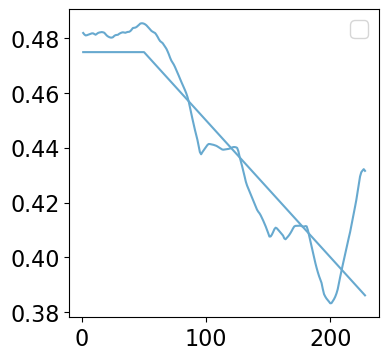

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2001:1
data is not good
Length of the timeseries is less than 90 days


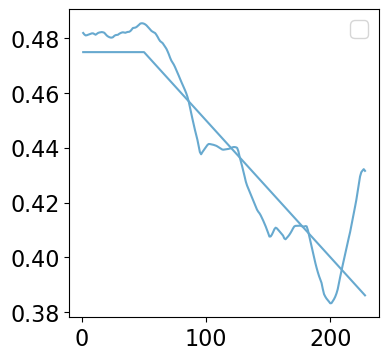

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Processing 2002:1
data is not good
Timeseries is empty


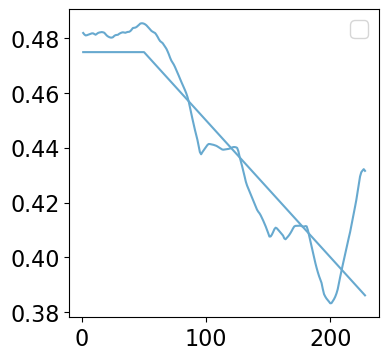

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


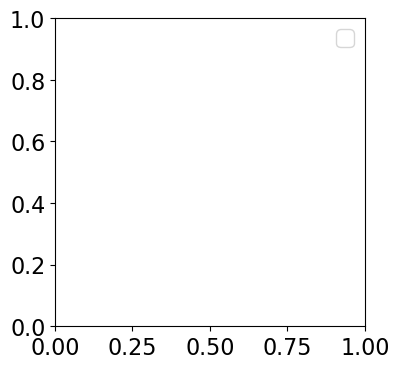

In [13]:
sig_obs = SMSig(
    ts_time=data.index.to_numpy(),
    ts_value=data.to_numpy(),
    plot_results=True,
    plot_label="obs",
    verbose=True
)
# sig_obs.detrend() # TODO:debug
season_trans_obs, start_dates_obs, end_dates_obs = sig_obs.calc_seasontrans(t_valley=t_valley_manual_input)

(array([[2450874.48801037, 2450985.27706444, 2451063.49892274,
         2451261.49892274],
        [2451249.2146595 , 2451340.54000311, 2451428.49908518,
         2451626.49908518],
        [2451648.72761903, 2451694.01322899, 2451793.50000001,
         2451991.50000001],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan],
        [             nan,              nan,              nan,
                      nan]]),
 [Timestamp('1998-03-01 23:42:44.095603'),
  Timestamp('1999-03-11 17:09:06.581008'),
  Timestamp('2000-04-14 05:27:46.284559'),
  Timestamp('2001-02-08 10:24:48.426300'),
  Timestamp('1998-09-06 23:58:26.924653'),
  Timestamp('1999-09-06 23:58:40.959743'),
  Timestamp('2000-09-06 00:00:00.000479')],
 [Timestamp('1998-06-20 18:38:58.367507'),
  Timestamp('1999-06-11 00:57:36.268464'),
  Timestamp('2000-05-29 12:19:02.984401'),
  Timestamp('2001-06-

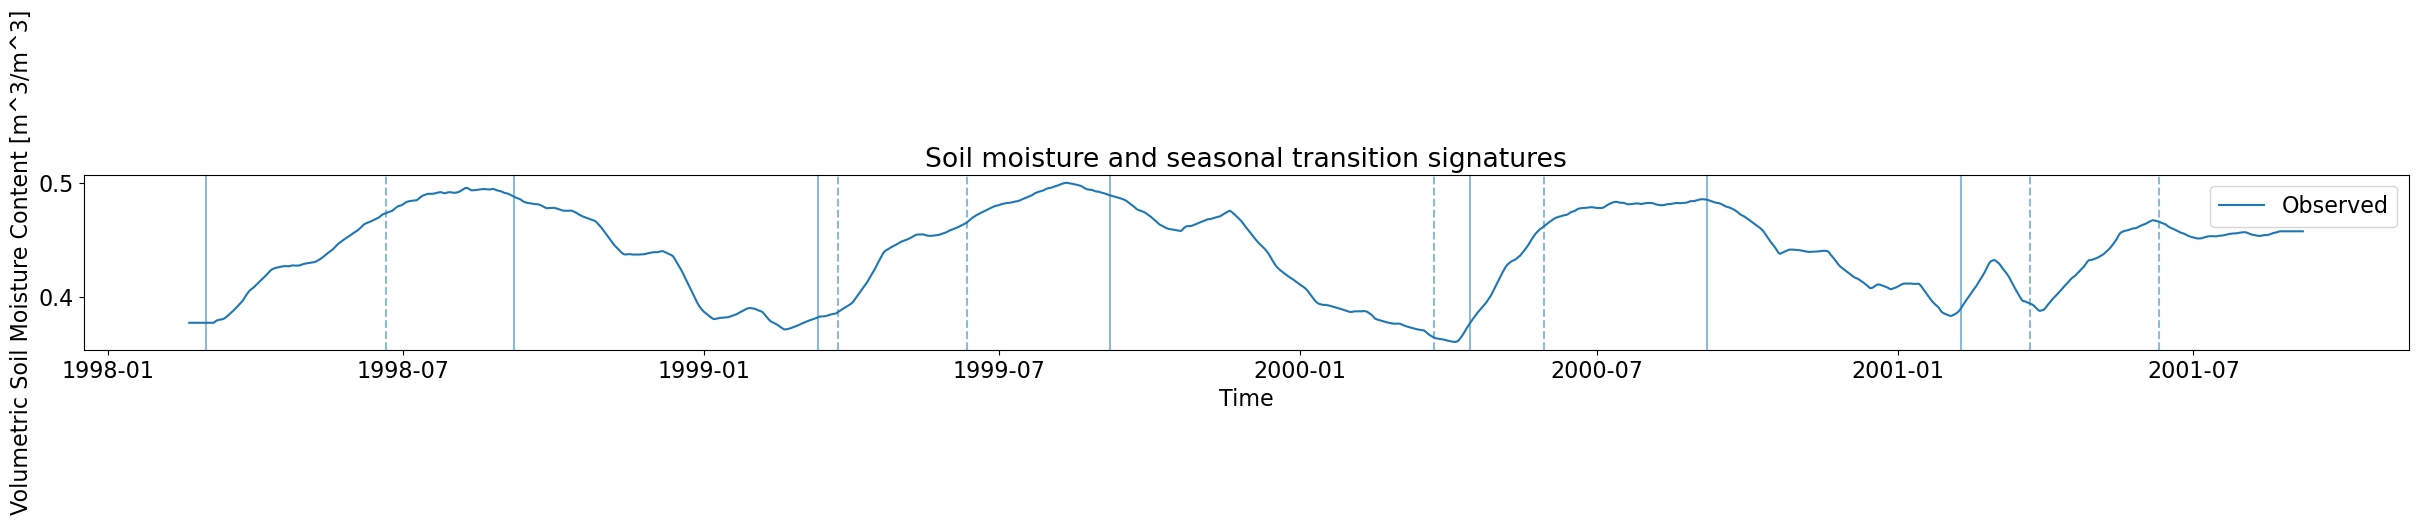

In [14]:

# Plot out the results
# df_obs = obs_synced
# df_sim = sim_synced
obs_label = 'Observed'
sim_label = 'Simulated'
obs_color = '#1f77b4'
sim_color = '#ff7f0e'
y_label = 'Volumetric Soil Moisture Content [m^3/m^3]'
title = 'Soil moisture and seasonal transition signatures'
fn = 'timeseries.png'

# Relative values of SM 
f2 = plt.figure(figsize=(30, 5))
ax2 = f2.add_subplot(2,1,1)
ax2.plot(sig_obs.tt.index, sig_obs.tt.values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(sig_sim.tt.index, sig_sim.tt.values, alpha=1, label=sim_label, color=sim_color)
# ax2.plot(df["Time"].values, df_obs[var_name].values, alpha=1, label=obs_label, color=obs_color)
# ax2.plot(df["Time"].values, df_sim[var_name].values, alpha=1, label=sim_label, color=sim_color)
for i in range(len(start_dates_obs)):
    ax2.axvline(x=start_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='-')
for i in range(len(end_dates_obs)):
    ax2.axvline(x=end_dates_obs[i], color=obs_color, label=None, alpha=0.5, linestyle='--')
# for i in range(len(start_dates_sim)):
#     ax2.axvline(x=start_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='-')
# for i in range(len(end_dates_sim)):
#     ax2.axvline(x=end_dates_sim[i], color=sim_color, label=None, alpha=0.5, linestyle='--')
ax2.set_xlabel('Time')
ax2.set_ylabel(y_label)
ax2.set_title(title)
ax2.legend()

# f2.savefig(os.path.join(out_path, fn), dpi=600)
season_trans_obs, start_dates_obs, end_dates_obs

# Save the results